### Problem Statement

Develop an effective and reliable intrusion detection system (IDS) capable of accurately identifying and alerting on anomalous network behavior indicative of unauthorized access, malicious activities, or potential security threats. The IDS should be able to analyze network traffic data in real-time or near real-time, leveraging machine learning and/or statistical techniques to differentiate between normal and abnormal network behavior. Additionally, the IDS should provide timely alerts and actionable insights to network administrators or security personnel, enabling prompt response and mitigation of security incidents.

### Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_selection import RFE
import itertools
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("kddcup99.csv")

In [3]:
df[df['hot']==1]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
9,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.00,0.00,0.0,0.0,normal
519,0,tcp,http,SF,268,338,0,0,0,1,...,255,1.0,0.0,0.01,0.05,0.00,0.00,0.0,0.0,normal
998,0,tcp,http,SF,231,5283,0,0,0,1,...,247,1.0,0.0,0.03,0.07,0.00,0.00,0.0,0.0,normal
1395,0,tcp,http,SF,196,338,0,0,0,1,...,255,1.0,0.0,0.01,0.01,0.00,0.00,0.0,0.0,normal
1898,0,tcp,http,SF,297,27928,0,0,0,1,...,255,1.0,0.0,0.01,0.04,0.00,0.00,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492984,0,tcp,http,SF,228,29148,0,0,0,1,...,255,1.0,0.0,0.01,0.04,0.00,0.00,0.0,0.0,normal
493395,0,tcp,http,SF,150,17575,0,0,0,1,...,255,1.0,0.0,0.01,0.04,0.00,0.00,0.0,0.0,normal
493437,0,tcp,http,SF,179,10510,0,0,0,1,...,255,1.0,0.0,0.06,0.06,0.00,0.00,0.0,0.0,normal
493495,0,tcp,http,SF,322,8528,0,0,0,1,...,255,1.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,normal


In [4]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
lnum_compromised               0
lroot_shell                    0
lsu_attempted                  0
lnum_root                      0
lnum_file_creations            0
lnum_shells                    0
lnum_access_files              0
lnum_outbound_cmds             0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [5]:
df.duplicated().sum()

348435

In [6]:
df.nunique()

duration                        2495
protocol_type                      3
service                           66
flag                              11
src_bytes                       3300
dst_bytes                      10725
land                               2
wrong_fragment                     3
urgent                             4
hot                               22
num_failed_logins                  6
logged_in                          2
lnum_compromised                  23
lroot_shell                        2
lsu_attempted                      3
lnum_root                         20
lnum_file_creations               18
lnum_shells                        3
lnum_access_files                  7
lnum_outbound_cmds                 1
is_host_login                      1
is_guest_login                     2
count                            490
srv_count                        470
serror_rate                       92
srv_serror_rate                   51
rerror_rate                       77
s

In [7]:
df.duplicated().sum()

348435

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
lr = LabelEncoder()#Converted categorical to numerical
df['label']=lr.fit_transform(df['label'])
df['service']=lr.fit_transform(df['service'])

In [10]:
df['protocol_type']=lr.fit_transform(df['protocol_type'])
df['flag']=lr.fit_transform(df['flag'])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop(columns=['label'])
y = df['label']

### Splitting the data into train and test

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=44)


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sd = StandardScaler()
X_train = sd.fit_transform(X_train,y_train)
X_test = sd.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr = LogisticRegression()

In [18]:
lr.fit(X_train,y_train)

/Users/divyanshsingh/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pred = lr.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(y_test,y_pred)

0.9987753532245658

In [23]:
numerical_columns = ['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'urgent', 'hot',
                     'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
                     'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
                     'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login', 
                     'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
                     'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
                     'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
                     'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
                     'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
                     'dst_host_serror_rate', 'dst_host_srv_serror_rate',
                     'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [24]:
# Group by the 'label' column and aggregate numerical columns using mean, median, and sum
#df = df.groupby('label')[numerical_columns].agg('mean').reset_index()
df = df.groupby('label')[numerical_columns].agg('median').reset_index()
#df= df.groupby('label')[numerical_columns].agg('sum').reset_index()

In [25]:
df.duplicated().sum()

0

In [26]:

df

,label,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,0.0,54540.0,8314.0,0.0,0.0,2.0,0.0,1.0,1.0,...,255.0,255.0,1.000,0.00,0.000,0.00,0.000,0.000,0.04,0.04
1,1,51.0,1563.0,3815.5,0.0,0.0,3.0,0.0,1.0,1.0,...,2.0,3.0,1.000,0.00,1.000,0.00,0.000,0.000,0.00,0.00
2,2,13.0,110.0,227.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.5,2.5,1.000,0.00,1.000,0.01,0.000,0.000,0.00,0.00
3,3,0.0,126.0,179.0,0.0,0.0,1.0,1.0,0.0,0.0,...,26.0,26.0,1.000,0.00,0.040,0.00,0.060,0.060,0.94,0.94
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.5,5.5,1.000,0.00,0.765,0.00,0.555,0.555,0.00,0.00
5,5,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,202.0,1.000,0.00,1.000,0.50,0.000,0.000,0.00,0.00
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,1.000,0.00,1.000,0.38,1.000,0.800,0.00,0.00
7,7,21.0,142.0,1301.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.0,3.0,1.000,0.00,1.000,0.00,0.000,0.000,0.00,0.00
8,8,179.0,119.0,9139.0,0.0,0.0,1.0,0.0,1.0,0.0,...,2.0,1.0,1.000,0.00,1.000,0.00,0.000,0.000,0.00,0.00
9,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,255.0,11.0,0.040,0.07,0.000,0.00,1.000,1.000,0.00,0.00


### Model 1: Deep Multi-Class Classification (CNN or MLP):

Epoch 1/5
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 12s 906us/step - accuracy: 0.9936 - loss: 0.0522
Epoch 2/5
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 11s 912us/step - accuracy: 0.9984 - loss: 0.0073
Epoch 3/5
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 10s 815us/step - accuracy: 0.9988 - loss: 0.0053
Epoch 4/5
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 10s 823us/step - accuracy: 0.9988 - loss: 0.0049
Epoch 5/5
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 11s 854us/step - accuracy: 0.9989 - loss: 0.0045
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 4s 298us/step - accuracy: 0.9991 - loss: 0.0033
Training loss: 0.0034536845050752163 Training accuracy: 0.9991447925567627
3088/3088 ━━━━━━━━━━━━━━━━━━━━ 1s 308us/step - accuracy: 0.9989 - loss: 0.0046
Test loss: 0.004498916212469339 Test accuracy: 0.9989473819732666
3088/3088 ━━━━━━━━━━━━━━━━━━━━ 1s 314us/step
Accuracy: 0.9989474110359905
Precision: 0.998905254528408
Recall: 0.9989474110359905
F1-score: 0.9989198789763079


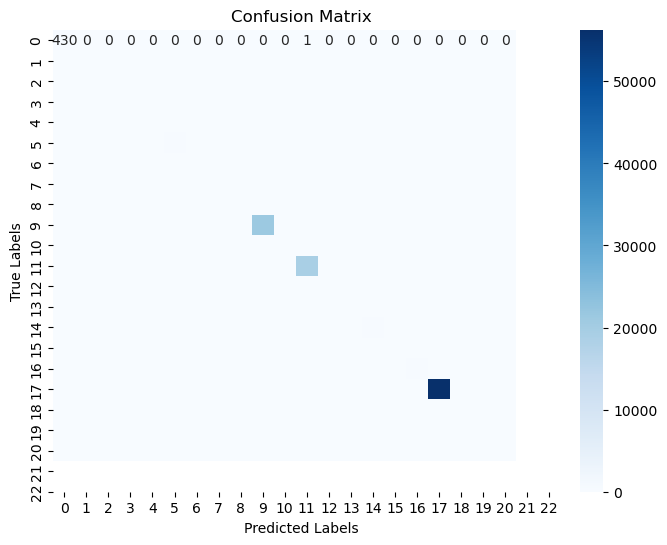

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Encode categorical features
le = LabelEncoder()
for col in X.select_dtypes(include=['object']):
    X[col] = le.fit_transform(X[col])

# Convert target variable to numerical format
y = le.fit_transform(y)

# Feature scaling for numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape the input data to have 3 dimensions (samples, time steps, features)
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Define the model (example with CNN)
model = keras.Sequential([
    keras.Input(shape=(X_reshaped.shape[1], X_reshaped.shape[2])),  # Define input shape using Input layer
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Flatten(),  # Flatten layer to convert from 2D to 1D for dense layers
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(set(y)) + 1, activation='softmax')  # Output layer with softmax for multi-class classification
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=5)

# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print('Training loss:', train_loss, 'Training accuracy:', train_accuracy)

# Evaluate the model on testing data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test loss:', test_loss, 'Test accuracy:', test_accuracy)

# Evaluate the model on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred_classes, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred_classes, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


### Model 2: Timeseries Classification (LSTM):

Epoch 1/6
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 9s 657us/step - accuracy: 0.9891 - loss: 0.1129 - val_accuracy: 0.9987 - val_loss: 0.0055
Epoch 2/6
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 8s 658us/step - accuracy: 0.9990 - loss: 0.0041 - val_accuracy: 0.9986 - val_loss: 0.0052
Epoch 3/6
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 8s 646us/step - accuracy: 0.9991 - loss: 0.0036 - val_accuracy: 0.9988 - val_loss: 0.0048
Epoch 4/6
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 8s 642us/step - accuracy: 0.9992 - loss: 0.0033 - val_accuracy: 0.9990 - val_loss: 0.0044
Epoch 5/6
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 8s 644us/step - accuracy: 0.9992 - loss: 0.0031 - val_accuracy: 0.9991 - val_loss: 0.0038
Epoch 6/6
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 8s 644us/step - accuracy: 0.9992 - loss: 0.0028 - val_accuracy: 0.9990 - val_loss: 0.0036
3088/3088 ━━━━━━━━━━━━━━━━━━━━ 1s 252us/step - accuracy: 0.9990 - loss: 0.0039
Test loss: 0.0035663964226841927
Test accuracy: 0.99904865026474
3088/3088 ━━━━━━━━━━━━━━━━━━━━ 1s 281us/step
Accuracy: 0.9

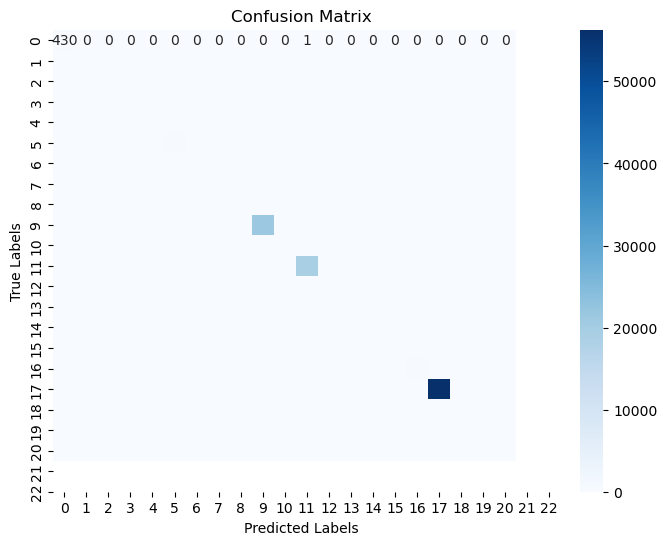

In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix




# Encode categorical features
le = LabelEncoder()
for col in X.select_dtypes(include=['object']):
    X[col] = le.fit_transform(X[col])

# Determine the number of classes for the output layer
num_classes = len(set(y))

# Feature scaling for numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape data for LSTM (assuming timesteps in each row)
num_samples, num_features = X_scaled.shape
timesteps = 1  # Assuming no sequence structure in the data
X_reshaped = X_scaled.reshape(num_samples, timesteps, num_features)

# Fit LabelEncoder on target labels
y_encoded = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_encoded, test_size=0.2, random_state=42)

# Define the model
inputs = keras.Input(shape=(timesteps, num_features))
x = layers.LSTM(32, return_sequences=True)(inputs)
x = layers.LSTM(32)(x)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=6, validation_data=(X_test, y_test))

# Evaluate the model 
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
print('Accuracy:', accuracy)

# Compute precision
precision = precision_score(y_test, y_pred_classes, average='weighted', zero_division=0)
print('Precision:', precision)

# Compute recall
recall = recall_score(y_test, y_pred_classes, average='weighted', zero_division=0)
print('Recall:', recall)

# Compute F1-score
f1 = f1_score(y_test, y_pred_classes, average='weighted')
print('F1-score:', f1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


### Model 3: Individual Feature Classification (MLP):

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split



# Determine the number of classes for the output layer
num_classes = len(set(y))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode target variable if necessary
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Verify label values are within the expected range
if max(y_train_encoded) >= num_classes or max(y_test_encoded) >= num_classes:
    raise ValueError("Label values are outside the expected range.")

# Define the model using an Input layer to specify the input shape explicitly
inputs = keras.Input(shape=X_train_scaled.shape[1:])  # Specify input shape

# Hidden layers
x = layers.Dense(128, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)

# Output layer with softmax for multi-class classification
outputs = layers.Dense(num_classes, activation='softmax')(x)

# Create the model
model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train_encoded, epochs=5, validation_data=(X_test_scaled, y_test_encoded))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test_encoded)
print('Test loss:', loss, 'Test accuracy:', accuracy)


Epoch 1/5
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 4s 331us/step - accuracy: 0.9935 - loss: 0.0509 - val_accuracy: 0.9986 - val_loss: 0.0066
Epoch 2/5
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 4s 330us/step - accuracy: 0.9987 - loss: 0.0052 - val_accuracy: 0.9983 - val_loss: 0.0080
Epoch 3/5
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 4s 327us/step - accuracy: 0.9989 - loss: 0.0049 - val_accuracy: 0.9991 - val_loss: 0.0092
Epoch 4/5
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 4s 330us/step - accuracy: 0.9991 - loss: 0.0047 - val_accuracy: 0.9990 - val_loss: 0.0084
Epoch 5/5
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 4s 330us/step - accuracy: 0.9991 - loss: 0.0098 - val_accuracy: 0.9991 - val_loss: 0.0068
3088/3088 ━━━━━━━━━━━━━━━━━━━━ 1s 201us/step - accuracy: 0.9990 - loss: 0.0060
Test loss: 0.0067873126827180386 Test accuracy: 0.9990891218185425


### Model 4: Using a deep network for anomaly detection: Autoencoder for Anomaly Detection

In [30]:
# Define the autoencoder model
def build_autoencoder(input_shape):
    inputs = keras.Input(shape=input_shape)
    encoded = layers.Dense(128, activation='relu')(inputs)
    encoded = layers.Dense(64, activation='relu')(encoded)
    decoded = layers.Dense(input_shape[0], activation='sigmoid')(encoded)
    model = keras.Model(inputs=inputs, outputs=decoded)
    return model

# Create the autoencoder model
autoencoder = build_autoencoder(X_scaled.shape[1:])

# Compile the model (use mean squared error for reconstruction loss)
autoencoder.compile(loss='mse', optimizer='adam')

# Split the dataset into training and testing sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

# Train the model on the training set
autoencoder.fit(X_train, X_train, epochs=5)

# Anomaly detection using reconstruction error threshold on the testing set
reconstruction_errors = np.mean(np.square(X_test - autoencoder.predict(X_test)), axis=1)
threshold = 0.5  # You can adjust this threshold based on your data

anomalies = X_test[reconstruction_errors > threshold]

# Further analysis or flagging of anomalies can be done here

print(f"Number of anomalies detected: {len(anomalies)}")

Epoch 1/5
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 4s 280us/step - loss: 0.6512
Epoch 2/5
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 3s 279us/step - loss: 0.6860
Epoch 3/5
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 3s 282us/step - loss: 0.6916
Epoch 4/5
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 3s 278us/step - loss: 0.7369
Epoch 5/5
12351/12351 ━━━━━━━━━━━━━━━━━━━━ 3s 281us/step - loss: 0.7468
3088/3088 ━━━━━━━━━━━━━━━━━━━━ 1s 199us/step
Number of anomalies detected: 19859


In [31]:
df.shape

(23, 38)